#Importing libraries


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

# 
from sklearn.cluster import KMeans
from sklearn import preprocessing

# Needed for Kmeans and Elbow method
from sklearn.cluster import KMeans

# Needed for dendrogram
import scipy
from scipy.cluster import hierarchy

In [5]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# 1. Clustering excercise - create customer clusters (segments)

Businesses cluster their customers to target their activities (e.g. marketing/sales campaigns)
Example dataset 'Mall customers'.

Note: 'Spending score' is a value or rating given by the Mall

## 1.1. Reading and preparing data into a DataFrame

In [6]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
dataset.shape

(200, 5)

In [8]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


I want to finetune the analysis, and bring in the 'Genre' into equation, and see also
how 'Male' and 'Female' might appear in the clustering.

In [9]:
dataset['Genre2'] = dataset['Genre'].replace(['Male', 'Female'], [0, 1]).astype(int)
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre2
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [10]:
#dataset.info()

In [11]:
# Features for the dataset

df = dataset.iloc[:,3:6]
df.head()

,Annual Income (k$),Spending Score (1-100),Genre2
0,15,39,0
1,15,81,0
2,16,6,1
3,16,77,1
4,17,40,1


In [12]:
# Saving column names
colnames = df.columns

In [13]:
# Feature matrix

x = df.values
x[0:10]

array([[15, 39,  0],
       [15, 81,  0],
       [16,  6,  1],
       [16, 77,  1],
       [17, 40,  1],
       [17, 76,  1],
       [18,  6,  1],
       [18, 94,  1],
       [19,  3,  0],
       [19, 72,  1]])

In [14]:
# Scaling the values 
x_scaled = preprocessing.scale(x)
x_scaled[0:10]

array([[-1.73899919, -0.43480148, -1.12815215],
       [-1.73899919,  1.19570407, -1.12815215],
       [-1.70082976, -1.71591298,  0.88640526],
       [-1.70082976,  1.04041783,  0.88640526],
       [-1.66266033, -0.39597992,  0.88640526],
       [-1.66266033,  1.00159627,  0.88640526],
       [-1.62449091, -1.71591298,  0.88640526],
       [-1.62449091,  1.70038436,  0.88640526],
       [-1.58632148, -1.83237767, -1.12815215],
       [-1.58632148,  0.84631002,  0.88640526]])

# 2. Cluster Analysis

First step is to evaluate how many clusters are optimal.
Two methods tested: 'dendrogram' and 'k-means Elbow'

## 2.1. KMeans/Elbow  method
To verify optimal number of clusters.


Comment:
interestingly, if the data is scaled, it affects the Elbow curve (and results suggesting reducing the clusters)

[600.0, 398.68826155420516, 314.53518794906665, 234.13674237656744, 200.72062305838529, 156.12310764718836, 125.58535025038735, 99.11589772313178, 80.24821759731631]


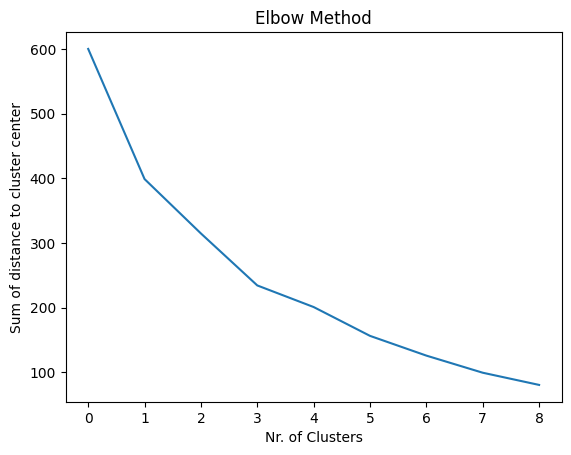

In [15]:
wcss = []  # Within-cluster sum of squares, calculating distances between center of cluster and observations.

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

for i in range(1,10):
    kmeans=KMeans(n_clusters=i, init='k-means++' )    # number of clusters/centroids, method for initialization
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

print(wcss)

plt.plot(wcss)
plt.title('Elbow Method')
plt.xlabel('Nr. of Clusters')
plt.ylabel('Sum of distance to cluster center')

plt.show()


## 2.2. Dendrogram method for analysing optimal nr. of clusters

Comparing the two,
at 'distance' 200, the Elbow method suggest 3 clusters (0r 4 when scaled) and Dendrogram suggests 5 (or 6 when scaled).
at 'distance' 100, the suggestions are 7 and 8 (or 10 when scaled).

At least they are on the same ballpark.

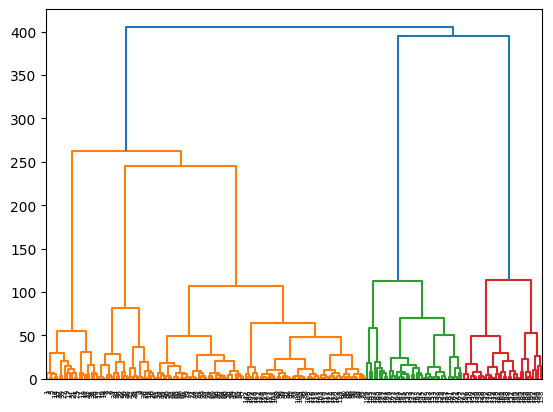

In [16]:
dendro=hierarchy.dendrogram(hierarchy.linkage(x,method='ward'))

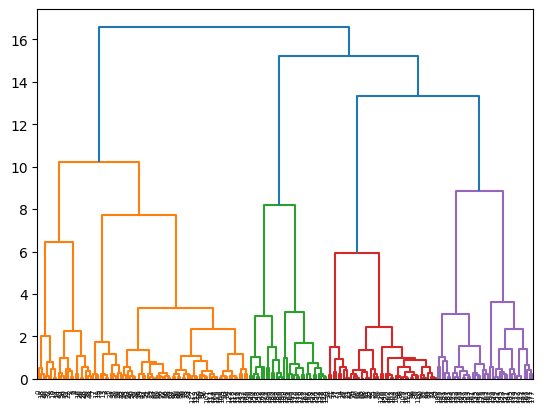

In [17]:
dendro=hierarchy.dendrogram(hierarchy.linkage(x_scaled,method='ward'))

# 3. Clustering the consumers

Different clustering values have been tested. The results are from the final selection of 4 clusters.


## 3.1. Training the model

Output is the list of predicted clusters for each customer.
Additionally the center of clusters are calculated and stored in a dataframe.

In [18]:
kmeans_1 = KMeans(n_clusters = 4)
kmeans_1.fit(x)

cluster_pred=kmeans_1.predict(x)  # List of 200, everyone assign to one of the clusters

cluster_labels=kmeans_1.labels_

cluster_center =kmeans_1.cluster_centers_ # Coordinates of the n. cluster centers
print(cluster_pred)
print(cluster_center)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
[[48.26       56.48        0.59      ]
 [87.         18.63157895  0.47368421]
 [86.53846154 82.12820513  0.53846154]
 [26.30434783 20.91304348  0.60869565]]


In [19]:
cluster_pred.shape

(200,)

The following builds a new dataset comprising of original data (user data), but complemented
with the information on the cluster number the user is assigned into.

In [20]:
# Let's rebuild the dataset information with predicted cluster information

dataset_with_clusters = dataset.copy()
dataset_with_clusters['Cluster'] = cluster_labels


dataset_with_clusters

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre2,Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2
196,197,Female,45,126,28,1,1
197,198,Male,32,126,74,0,2
198,199,Male,32,137,18,0,1


In [27]:
# Share of customers in each cluster/ segment
dataset_with_clusters['Cluster'].value_counts()


Cluster
0    100
2     39
1     38
3     23
Name: count, dtype: int64

In [21]:
df_centers = pd.DataFrame(cluster_center, columns=colnames)
df_centers

,Annual Income (k$),Spending Score (1-100),Genre2
0,48.260000,56.480000,0.590000
1,87.000000,18.631579,0.473684
2,86.538462,82.128205,0.538462
3,26.304348,20.913043,0.608696


# 4. Visualization

Putting the consumers in a graph. As I selected three features ('Genre', 'Income', 'Shopping score')
the visualization is put in a 3D format.

Scaling the data causes an issue showing the cluster centers, thus for now, this is using the original values
in training and visualizing the data

## 4.1. Outcome, insights from the visualization

Taking the 'Genre' i.e. sex in the model doesn't seem to provide much value, but rather makes the interpretation
a bit more complicated.
We see that the shopping behaviour of both 'Genre' are pretty similar in terms of Income and Shopping score,
and 'Genre' doesn't seem to bring much value, and could be dropped from the analysis (if done again).

This suggest we can drop the 'Genre' information and look at the results in a 2D table for clarity. These
results are discussed in the last chapter 'Summary'.


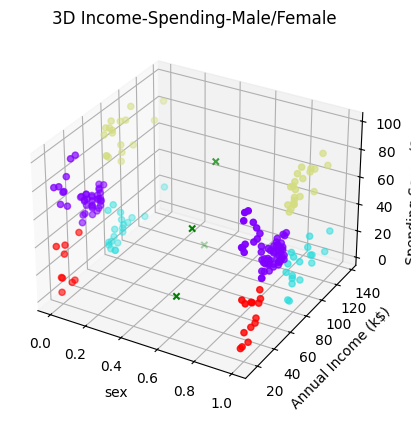

In [22]:
# Generate sample 3D data using make_blobs
x= dataset_with_clusters[['Genre2','Annual Income (k$)','Spending Score (1-100)']]
h=df_centers

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x['Genre2'],x['Annual Income (k$)'], x['Spending Score (1-100)'], c= dataset_with_clusters["Cluster"], marker='o',cmap= "rainbow")
ax.scatter(h['Genre2'],h['Annual Income (k$)'], h['Spending Score (1-100)'], marker='x', color='g')

# Set labels and title
ax.set_xlabel('sex')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Income-Spending-Male/Female')

# Show the plot
plt.show()

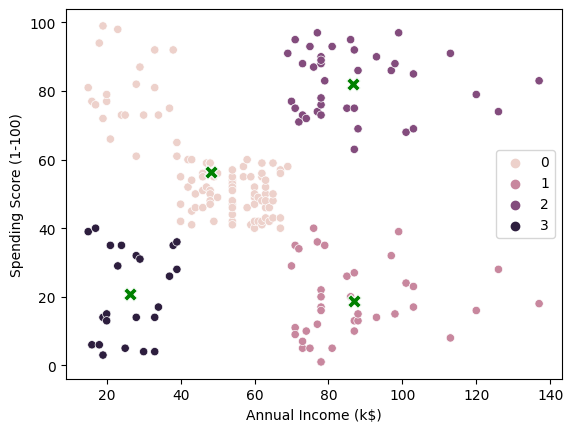

In [26]:
import seaborn as sns

sns.scatterplot(data=dataset_with_clusters, x="Annual Income (k$)", y="Spending Score (1-100)", hue='Cluster')
sns.scatterplot(data=h, x='Annual Income (k$)', y='Spending Score (1-100)', marker='X', color='green', s=100)
plt.show()


# 5. Summary

The 2D table gives much more intuitive view to clusters i.e. customer segments than the 3D picture with 'genre'
information. This suggests it is important to experiment with selecting different data and visualization to 
get the insights from the data.

For instance, we see here four distinct segments based on the earlier decision that we use four clusters. 4-5 segments
seemed to be the optimal balance suggested by the two methods 'Elbow' and 'Dendrogram'.

The four customer segments in this case are
- 23 customers in "Low income-low spending" (lower left corner)
- 100 customers in "Low-to-mid income - (relatively) high spending" (on upper left corner)
- 38 customers in "Mid-to-high income - low spending"
- 39 customers in "Mid-to-high income - high spending"

While we would be tempted to address the "high income - high spending" segment, we see that
"Low-to-mid income - high spending" segment has 2.5 times more people making it an interesting group.

This highlights the opportunities (insights) that the usage of data offers to businesses to make educated decisions
that aligns with their strategy (unless they want to start changing their strategy based on the insights) 